## MODELOS DE SERIES DE TIEMPO (ARIMA y SARIMA) PARA PRONÓSTICO DE DEMANDA DE GAS NATURAL EN SECTOR PETROLERO EN MÉXICO 
## UNAM
## Alumno: Ibarra Ramírez Sergio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Se lee la data "original" de Demanda en sector eléctrico 

In [3]:
csv_demanda_petrolero_original = pd.read_csv('Demanda_petrolero_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_petrolero_original

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2022-05-01,1919.43
2022-06-01,1876.88
2022-07-01,1979.70


Se grafica la data "original" de Demanda en sector eléctrico 

Text(0, 0.5, 'Demanda [MMpcd]')

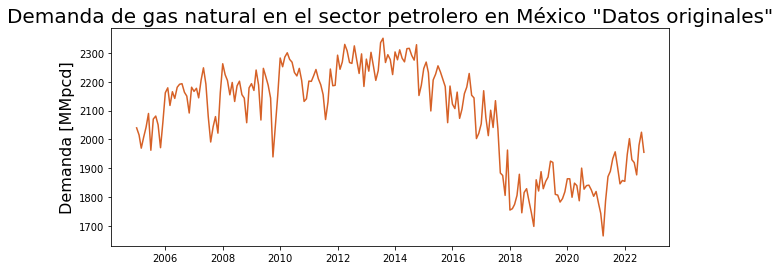

In [4]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_petrolero_original, color='#D66127')
plt.title('Demanda de gas natural en el sector petrolero en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se descompone la data "original" de Demanda en sector eléctrico  en sus compoentes de Tendencia, Estacionalidad y Residual

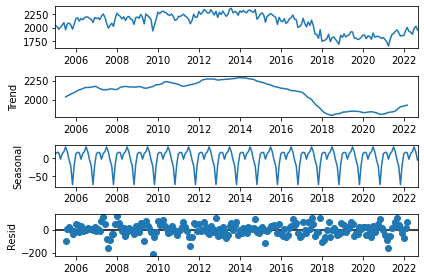

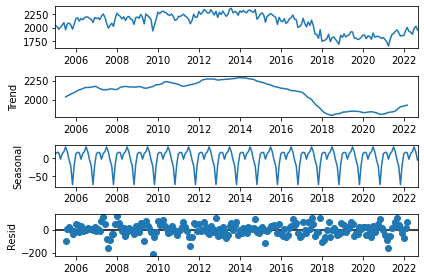

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_petrolero_original_seasonal_decomposition = seasonal_decompose(csv_demanda_petrolero_original, period=12)
demanda_petrolero_original_seasonal_decomposition.plot()

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la data "original" de Demanda en sector eléctrico

En la prueba DF H0 que establece que la serie NO es estacionaria. Es decir que el valor de la Unit Root p=1 y por lo tanto la serie es una especie de ruido blanco. Ha: Establece qe p<1 y por lo tanto la serie tiene un componente determinístico que la hace tender hacia un valor medio

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_petrolero_original_sin_diferenciar = adfuller(csv_demanda_petrolero_original)


adf_test_petrolero_original_sin_diferenciar

(-1.1958316553301573,
 0.6753862532065207,
 14,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 2194.9970975214874)

In [7]:
print(f"The ADF statistic value f is: {adf_test_petrolero_original_sin_diferenciar[0]}")

print(f"The ADF p value p is: {adf_test_petrolero_original_sin_diferenciar[1]}")

if adf_test_petrolero_original_sin_diferenciar[0] < adf_test_petrolero_original_sin_diferenciar[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -1.1958316553301573
The ADF p value p is: 0.6753862532065207
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


Se elaboran las gráficas de ACF y PACF de la data "original" de Demanda en sector petrolero

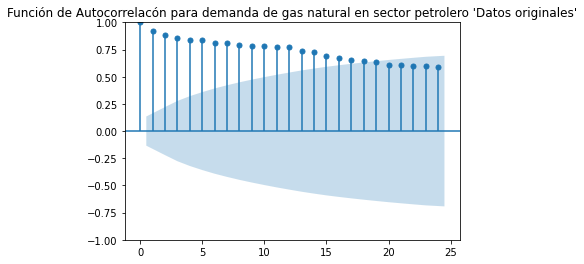

In [8]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(csv_demanda_petrolero_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector petrolero 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


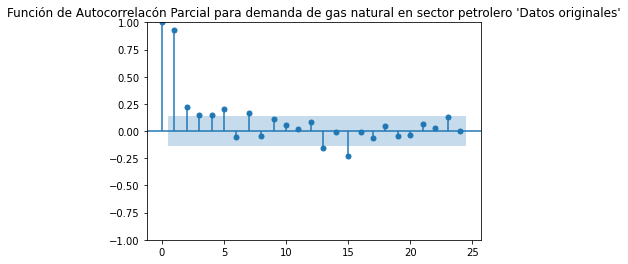

In [9]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(csv_demanda_petrolero_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector petrolero 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie de data "original" de Demanda en sector petrolero para lograr estacionariedad 

In [10]:
demanda_petrolero_original_diff1 = csv_demanda_petrolero_original.diff()
demanda_petrolero_original_diff1

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,-24.63
2005-03-01,-45.74
2005-04-01,38.68
2005-05-01,33.67
...,...
2022-05-01,-10.04
2022-06-01,-42.55
2022-07-01,102.82


Se grafica la diferencia de la la serie de data "original" de Demanda en sector eléctrico

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

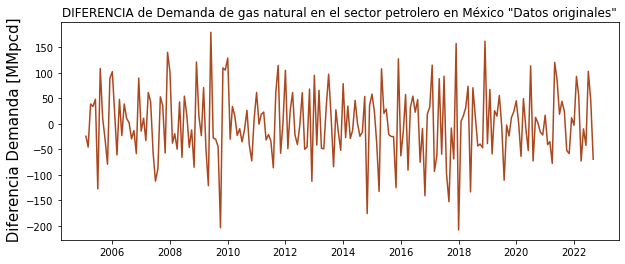

In [11]:
plt.figure(figsize=(10,4))
plt.plot(demanda_petrolero_original_diff1, color='#AA481F')
plt.title('DIFERENCIA de Demanda de gas natural en el sector petrolero en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_petrolero_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_petrolero_original_diferencia1 = adfuller(demanda_petrolero_original_diff1)


adf_test_petrolero_original_diferencia1

(-3.490427723004424,
 0.00823636059948164,
 13,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 2184.4985862724207)

In [13]:
print(f"The ADF statistic value f is: {adf_test_petrolero_original_diferencia1[0]}")

print(f"The ADF p value p is: {adf_test_petrolero_original_diferencia1[1]}")

if adf_test_petrolero_original_diferencia1[0] < adf_test_petrolero_original_diferencia1[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -3.490427723004424
The ADF p value p is: 0.00823636059948164
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

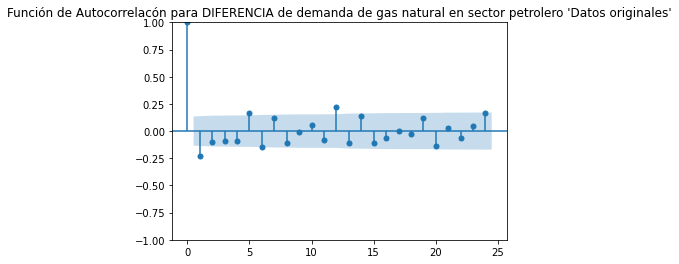

In [14]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_petrolero_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector petrolero 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


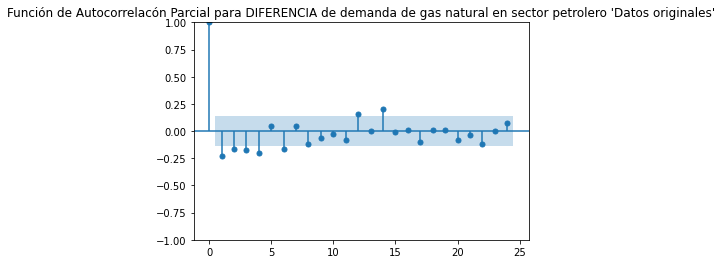

In [15]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_petrolero_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector petrolero 'Datos originales'")

# Show the plot
plt.show()

Separamos la data original de Demanda de gas natural en el sector eléctrico en data de train y test

In [16]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_petrolero_original_train_data = csv_demanda_petrolero_original[:-num_test_points]
demanda_petrolero_original_test_data = csv_demanda_petrolero_original[-num_test_points:]

demanda_petrolero_original_train_data

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2021-05-01,1785.32
2021-06-01,1870.67
2021-07-01,1889.20


Se grafica la distribución de la data "original" de Demanda en sector eléctrico

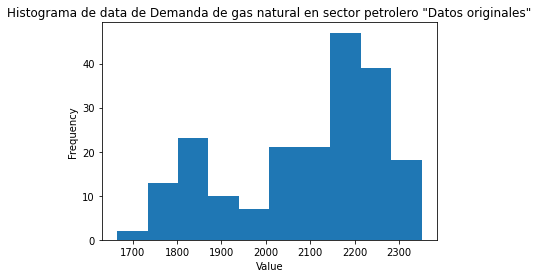

In [17]:
# Generate the histogram
plt.hist(demanda_petrolero_original_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector petrolero "Datos originales"')

# Display the plot
plt.show()

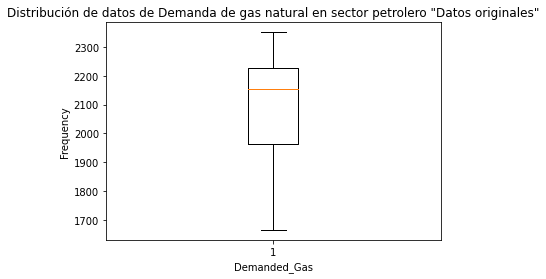

In [18]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_petrolero_original_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector petrolero "Datos originales"')

# Display the plot
plt.show()

### Se define y entrena modelo ARIMA para el caso de la data original de Demanda en el sector petrolero

In [19]:

##Create the model
model_ARIMA_petrolero_original = ARIMA (demanda_petrolero_original_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_petrolero_original_fit = model_ARIMA_petrolero_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_petrolero_original_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\User

Model fitting time 0.7840371131896973
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1104.565
Date:                Sat, 07 Oct 2023   AIC                           2227.130
Time:                        12:32:37   BIC                           2256.815
Sample:                    01-01-2005   HQIC                          2239.143
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2105      0.065     -3.238      0.001      -0.338      -0.083
ar.L2          1.0042      0.072     13.933      0.000       0.863       1.145
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [20]:
##get prediction start and end dates 
pred_model_ARIMA_petrolero_start_date = demanda_petrolero_original_test_data.index[0]
pred_model_ARIMA_petrolero_end_date = demanda_petrolero_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_petrolero_original = model_ARIMA_petrolero_original_fit.predict(start=pred_model_ARIMA_petrolero_start_date, end= pred_model_ARIMA_petrolero_end_date)
print(predictions_model_ARIMA_petrolero_original)

2021-10-01    1852.942279
2021-11-01    1849.984414
2021-12-01    1805.067361
2022-01-01    1847.060272
2022-02-01    1875.156278
2022-03-01    1907.261704
2022-04-01    1970.446375
2022-05-01    1960.115474
2022-06-01    2008.085096
2022-07-01    1971.266120
2022-08-01    1975.541381
2022-09-01    1952.806193
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

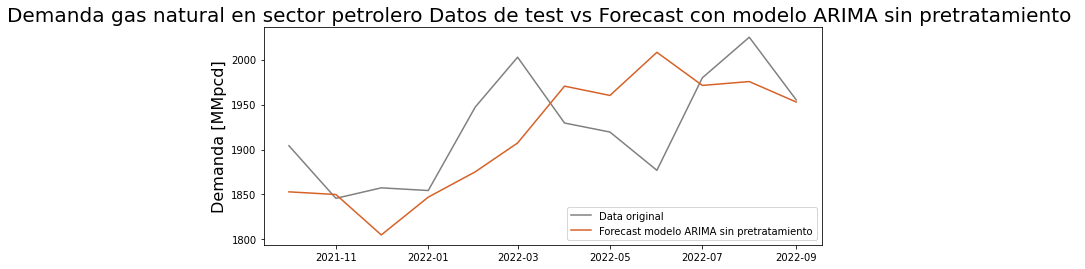

In [21]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data, color='gray')
plt.plot(predictions_model_ARIMA_petrolero_original, color='#D66127')
plt.legend(('Data original', 'Forecast modelo ARIMA sin pretratamiento'), fontsize=10)

plt.title('Demanda gas natural en sector petrolero Datos de test vs Forecast con modelo ARIMA sin pretratamiento ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [22]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_petrolero_original = mean_absolute_percentage_error(demanda_petrolero_original_test_data, predictions_model_ARIMA_petrolero_original)
RMSE_predictions_model_ARIMA_petrolero_original = np.sqrt(mean_squared_error(demanda_petrolero_original_test_data, predictions_model_ARIMA_petrolero_original))

print('MAPE:', MAPE_predictions_model_ARIMA_petrolero_original)
print('RMSE:', RMSE_predictions_model_ARIMA_petrolero_original)

MAPE: 0.024010466422006212
RMSE: 59.69913372801164


### Proceso de Pretratamiento (Ajuste de valores atípicos por media aritmetica y/o mediana de serie)  como una estrategia para mejorar los resultados de forecast de modelos ARIMA 

### Proceso de Pretratamiento Ajuste de valores atípicos por media aritmetica

In [23]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers_media(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

Se genera una copia del demanda_electrico_original para conservar los datos originales en un array y éstos no se vean afectados por el tratamiento de valores atípicos

In [24]:
# Create a copy of the original DataFrame
demanda_petrolero_original_train_data_para_tratamiento2 = demanda_petrolero_original_train_data.copy()
demanda_petrolero_original_train_data_para_tratamiento2

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2021-05-01,1785.32
2021-06-01,1870.67
2021-07-01,1889.20


In [25]:
demanda_petrolero_train_pretratamiento_media = remove_replace_outliers_media(demanda_petrolero_original_train_data_para_tratamiento2['Demanded_Gas'])
demanda_petrolero_train_pretratamiento_media

Date
2005-01-01    2039.88
2005-02-01    2015.25
2005-03-01    1969.51
2005-04-01    2008.19
2005-05-01    2041.86
               ...   
2021-05-01    1785.32
2021-06-01    1870.67
2021-07-01    1889.20
2021-08-01    1933.02
2021-09-01    1956.84
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers_media)


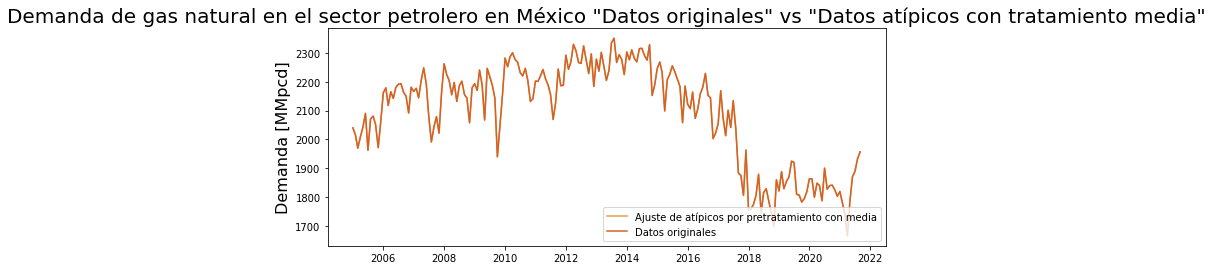

In [26]:
plt.figure(figsize=(10,4))
plt.plot(demanda_petrolero_train_pretratamiento_media, color='#E29E46')
plt.plot(demanda_petrolero_original_train_data,  color='#D66127')
plt.title('Demanda de gas natural en el sector petrolero en México "Datos originales" vs "Datos atípicos con tratamiento media"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
# Add a legend to the left bottom corner
plt.legend(['Ajuste de atípicos por pretratamiento con media', 'Datos originales'], loc='lower right', fontsize=10)


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos atípicos con tratamiento media"

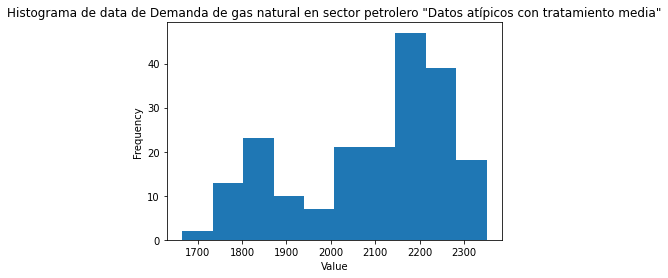

In [27]:
# Generate the histogram
plt.hist(demanda_petrolero_train_pretratamiento_media, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector petrolero "Datos atípicos con tratamiento media"')

# Display the plot
plt.show()

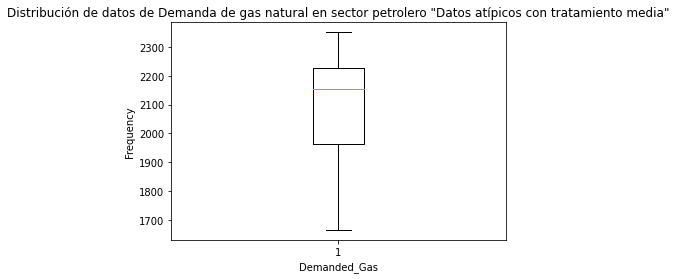

In [28]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_petrolero_train_pretratamiento_media)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector petrolero "Datos atípicos con tratamiento media"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos atípicos con tratamiento media"

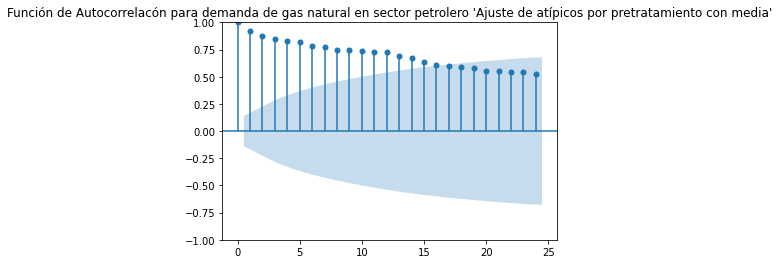

In [29]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_petrolero_train_pretratamiento_media.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


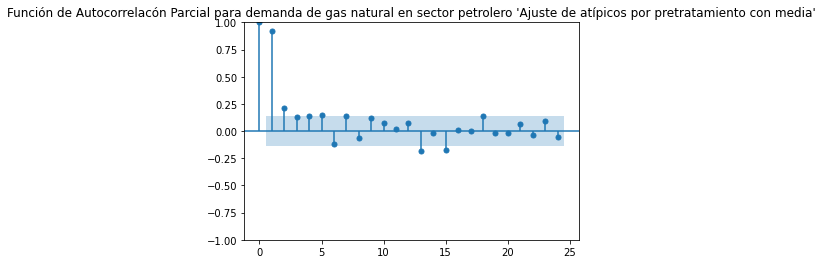

In [30]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_petrolero_train_pretratamiento_media.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data datos atípicos con tratamiento media 

In [31]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_petrolero_train_pretratamiento_media = adfuller(demanda_petrolero_train_pretratamiento_media)


adf_test_demanda_petrolero_train_pretratamiento_media

(-0.973790324855718,
 0.7627032611225253,
 14,
 186,
 {'1%': -3.466005071659723,
  '5%': -2.8772078537639385,
  '10%': -2.5751221620996647},
 2067.1911810147294)

In [32]:

print(f"The ADF statistic value f is: {adf_test_demanda_petrolero_train_pretratamiento_media[0]}")

print(f"The ADF p value p is: {adf_test_demanda_petrolero_train_pretratamiento_media[1]}")

if adf_test_demanda_petrolero_train_pretratamiento_media[0] < adf_test_demanda_petrolero_train_pretratamiento_media[4]['5%']:
      print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -0.973790324855718
The ADF p value p is: 0.7627032611225253
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [33]:
demanda_petrolero_train_tratamiento_media_diff1 = demanda_petrolero_train_pretratamiento_media.diff()
demanda_petrolero_train_tratamiento_media_diff1

Date
2005-01-01       NaN
2005-02-01    -24.63
2005-03-01    -45.74
2005-04-01     38.68
2005-05-01     33.67
               ...  
2021-05-01    120.15
2021-06-01     85.35
2021-07-01     18.53
2021-08-01     43.82
2021-09-01     23.82
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento media" DIFERENCIA 1

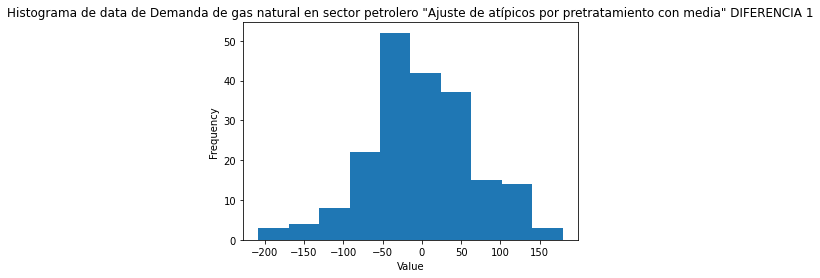

In [34]:
# Generate the histogram
plt.hist(demanda_petrolero_train_tratamiento_media_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector petrolero "Ajuste de atípicos por pretratamiento con media" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data con pretratamiento de media Diferencia 1

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_petrolero_train_tratamiento_media_diff1 = adfuller(demanda_petrolero_train_tratamiento_media_diff1.dropna())


adf_test_demanda_petrolero_train_tratamiento_media_diff1

(-3.4088290456675487,
 0.0106615471657898,
 13,
 186,
 {'1%': -3.466005071659723,
  '5%': -2.8772078537639385,
  '10%': -2.5751221620996647},
 2056.123890108526)

In [36]:
print(f"The ADF statistic value f is: {adf_test_demanda_petrolero_train_tratamiento_media_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_petrolero_train_tratamiento_media_diff1[1]}")

if adf_test_demanda_petrolero_train_tratamiento_media_diff1[0] < adf_test_demanda_petrolero_train_tratamiento_media_diff1[4]['5%']:
     print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -3.4088290456675487
The ADF p value p is: 0.0106615471657898
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


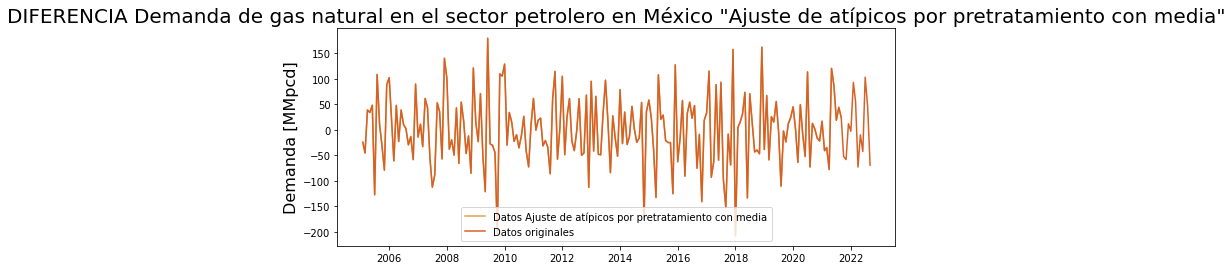

In [37]:
plt.figure(figsize=(10,4))
plt.plot(demanda_petrolero_train_tratamiento_media_diff1, color='#E29E46')
plt.plot(demanda_petrolero_original_diff1, color='#D66127')

plt.title('DIFERENCIA Demanda de gas natural en el sector petrolero en México "Ajuste de atípicos por pretratamiento con media"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
plt.legend(['Datos Ajuste de atípicos por pretratamiento con media', 'Datos originales'], loc='lower center', fontsize=10)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

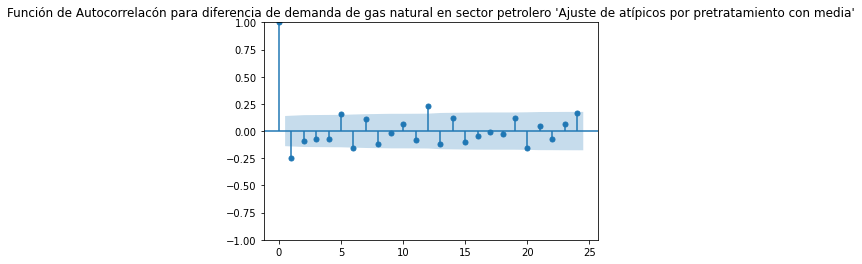

In [38]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_petrolero_train_tratamiento_media_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


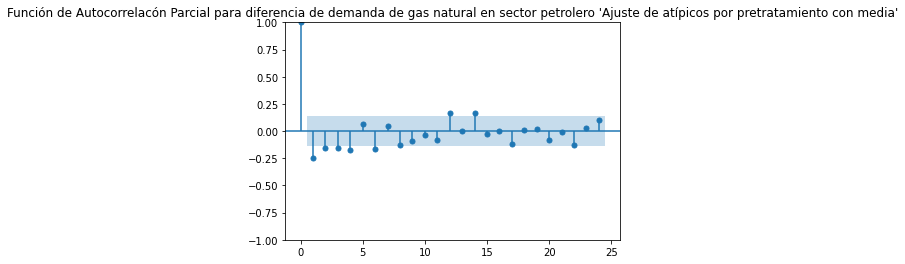

In [39]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_petrolero_train_tratamiento_media_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media'

In [40]:
##Create the model
model_ARIMA_petrolero_tratamiento_media = ARIMA (demanda_petrolero_train_pretratamiento_media, order=(4,1,3))

##Fit the model
start = time()
model_ARIMA_petrolero_tratamiento_media_fit = model_ARIMA_petrolero_tratamiento_media.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_petrolero_tratamiento_media_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.5110912322998047
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1105.200
Date:                Sat, 07 Oct 2023   AIC                           2226.400
Time:                        12:32:44   BIC                           2252.787
Sample:                    01-01-2005   HQIC                          2237.078
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2867      0.131     -9.838      0.000      -1.543      -1.030
ar.L2         -0.2050      0.287     -0.713      0.476      -0.769       0.358
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
##get prediction start and end dates 
pred_model_ARIMA_petrolero_start_date = demanda_petrolero_original_test_data.index[0]
pred_model_ARIMA_petrolero_end_date = demanda_petrolero_original_test_data.index[-1]


In [42]:
##get the predictors and residuals 
predictions_model_ARIMA_petrolero_tratamiento_media = model_ARIMA_petrolero_tratamiento_media_fit.predict(start=pred_model_ARIMA_petrolero_start_date, end= pred_model_ARIMA_petrolero_end_date)
print(predictions_model_ARIMA_petrolero_tratamiento_media)

2021-10-01    1884.270466
2021-11-01    1908.210779
2021-12-01    1866.218868
2022-01-01    1888.940316
2022-02-01    1882.463585
2022-03-01    1870.007181
2022-04-01    1898.532760
2022-05-01    1860.294326
2022-06-01    1900.004351
2022-07-01    1867.386787
2022-08-01    1885.959959
2022-09-01    1885.315211
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

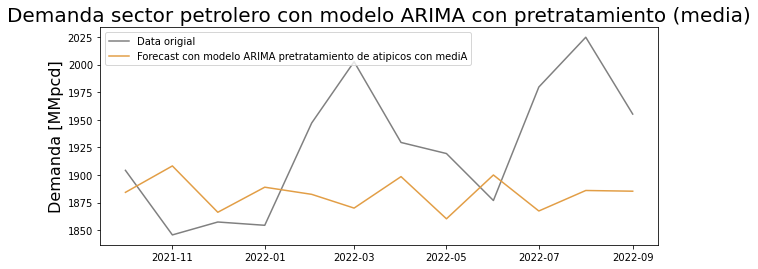

In [43]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_media, color='#E29E46')

plt.legend(('Data origial', 'Forecast con modelo ARIMA pretratamiento de atipicos con mediA'), fontsize=10)


plt.title('Demanda sector petrolero con modelo ARIMA con pretratamiento (media)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1

In [44]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_petrolero_tratamiento_media = mean_absolute_percentage_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_ARIMA_petrolero_tratamiento_media)
RMSE_predictions_model_ARIMA_petrolero_tratamiento_media = np.sqrt(mean_squared_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_ARIMA_petrolero_tratamiento_media))

print('MAPE:', MAPE_predictions_model_ARIMA_petrolero_tratamiento_media)
print('RMSE:', RMSE_predictions_model_ARIMA_petrolero_tratamiento_media)

MAPE: 0.032278868053211805
RMSE: 75.8900533887788


Text(0, 0.5, 'Demanda [MMpcd]')

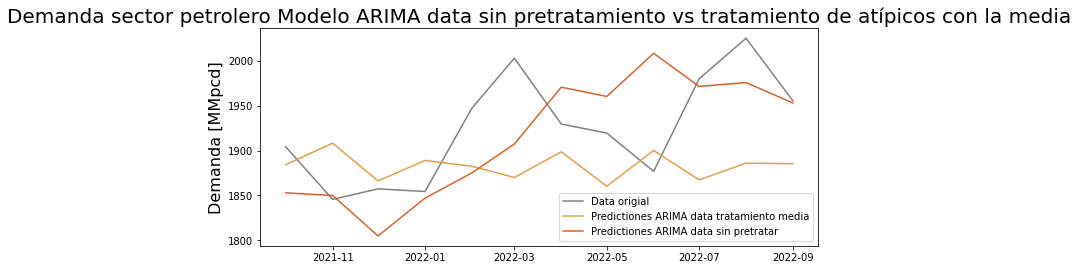

In [45]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_media, color='#E29E46')
plt.plot(predictions_model_ARIMA_petrolero_original, color='#D66127')

plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento media', 'Predictiones ARIMA data sin pretratar'), fontsize=10)

plt.title('Demanda sector petrolero Modelo ARIMA data sin pretratamiento vs tratamiento de atípicos con la media', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Vamos a entrenar un segundo modelo SARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media' 

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create the SARIMA model
model_SARIMA_petrolero_tratamiento_media = SARIMAX(demanda_petrolero_train_pretratamiento_media, order=(4, 1, 1), seasonal_order=(0, 1, 0, 12))

# Fit the SARIMA model
model_SARIMA_petrolero_tratamiento_media_fit = model_SARIMA_petrolero_tratamiento_media.fit()

# Print the summary of the model
print(model_SARIMA_petrolero_tratamiento_media_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Demanded_Gas   No. Observations:                  201
Model:             SARIMAX(4, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1082.201
Date:                             Sat, 07 Oct 2023   AIC                           2176.401
Time:                                     12:32:45   BIC                           2195.820
Sample:                                 01-01-2005   HQIC                          2184.269
                                      - 09-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1594      0.115    -10.097      0.000      -1.384      -0.934
ar.L2         -0.6221      

Se obtiene el forecas del model SARIMA electrico tratamiento media

In [47]:
##get the predictors and residuals 
predictions_model_SARIMA_petrolero_tratamiento_media = model_SARIMA_petrolero_tratamiento_media_fit.predict(start=pred_model_ARIMA_petrolero_start_date, end= pred_model_ARIMA_petrolero_end_date)
print(predictions_model_SARIMA_petrolero_tratamiento_media)

2021-10-01    1941.934722
2021-11-01    1905.079795
2021-12-01    1885.102992
2022-01-01    1916.919596
2022-02-01    1870.001845
2022-03-01    1835.944888
2022-04-01    1753.035471
2022-05-01    1877.551988
2022-06-01    1961.779246
2022-07-01    1980.941145
2022-08-01    2023.828442
2022-09-01    2047.866313
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

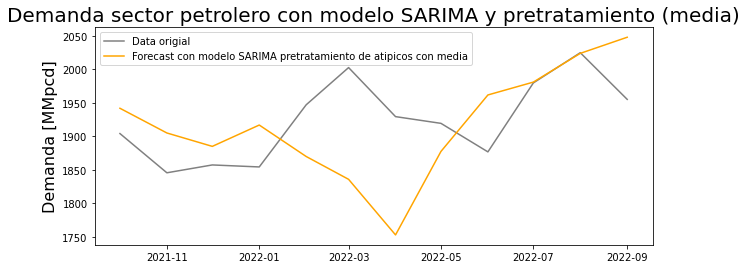

In [48]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_SARIMA_petrolero_tratamiento_media, color='orange')

plt.legend(('Data origial', 'Forecast con modelo SARIMA pretratamiento de atipicos con media'))


plt.title('Demanda sector petrolero con modelo SARIMA y pretratamiento (media)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1_v2

In [49]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_SARIMA_petrolero_tratamiento_media = mean_absolute_percentage_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_SARIMA_petrolero_tratamiento_media)
RMSE_predictions_model_SARIMA_petrolero_tratamiento_media = np.sqrt(mean_squared_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_SARIMA_petrolero_tratamiento_media))

print('MAPE:', MAPE_predictions_model_SARIMA_petrolero_tratamiento_media)
print('RMSE:', RMSE_predictions_model_SARIMA_petrolero_tratamiento_media)

MAPE: 0.035870956163984856
RMSE: 87.57669117317957


Text(0, 0.5, 'Demanda [MMpcd]')

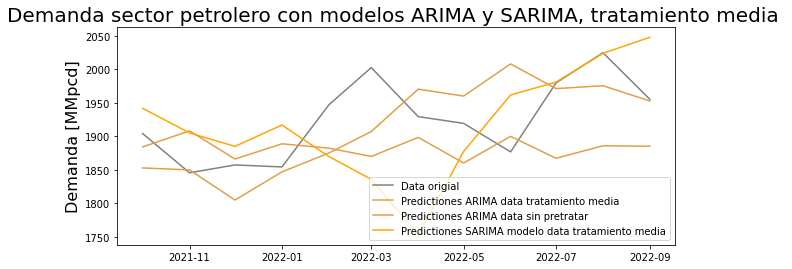

In [50]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_media, color='#E29E46')
plt.plot(predictions_model_ARIMA_petrolero_original, color='#E29E46')
plt.plot(predictions_model_SARIMA_petrolero_tratamiento_media, color='orange')

plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento media', 'Predictiones ARIMA data sin pretratar', 'Predictiones SARIMA modelo data tratamiento media'), fontsize=10)

plt.title('Demanda sector petrolero con modelos ARIMA y SARIMA, tratamiento media ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Proceso de Pretratamiento Ajuste de valores atípicos por mediana

In [51]:
import numpy as np
import tensorflow as tf

# Set a seed for numpy random number generation
np.random.seed(0)

# Set a seed for TensorFlow random number generation
tf.random.set_seed(0)

In [52]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers_mediana(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical meadian excluding outliers
    historical_median = np.median(data[~outliers_mask])

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_median

    return data

Se genera nuevamente una copia del demanda_electrico_original para conservar los datos originales en un array y éstos no se vean afectados por el tratamiento de valores atípicos

In [53]:
# Create a copy of the original DataFrame
demanda_petrolero_original_train_data_para_tratamiento2 = demanda_petrolero_original_train_data.copy()
demanda_petrolero_original_train_data_para_tratamiento2

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2021-05-01,1785.32
2021-06-01,1870.67
2021-07-01,1889.20


In [54]:
demanda_petrolero_train_pretratamiento_mediana = remove_replace_outliers_mediana(demanda_petrolero_original_train_data_para_tratamiento2['Demanded_Gas'])
demanda_petrolero_train_pretratamiento_mediana

Date
2005-01-01    2039.88
2005-02-01    2015.25
2005-03-01    1969.51
2005-04-01    2008.19
2005-05-01    2041.86
               ...   
2021-05-01    1785.32
2021-06-01    1870.67
2021-07-01    1889.20
2021-08-01    1933.02
2021-09-01    1956.84
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers_mediana)

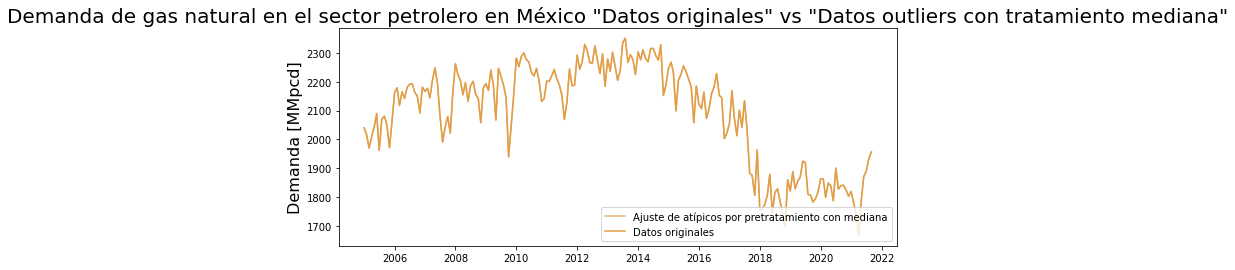

In [55]:
plt.figure(figsize=(10,4))
plt.plot(demanda_petrolero_train_pretratamiento_mediana, color='#E7B779')
plt.plot(demanda_petrolero_original_train_data, color='#E29E46')

plt.title('Demanda de gas natural en el sector petrolero en México "Datos originales" vs "Datos outliers con tratamiento mediana"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
# Add a legend to the left bottom corner
plt.legend(['Ajuste de atípicos por pretratamiento con mediana', 'Datos originales'], loc='lower right', fontsize=10)

Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos atípicos con tratamiento median"


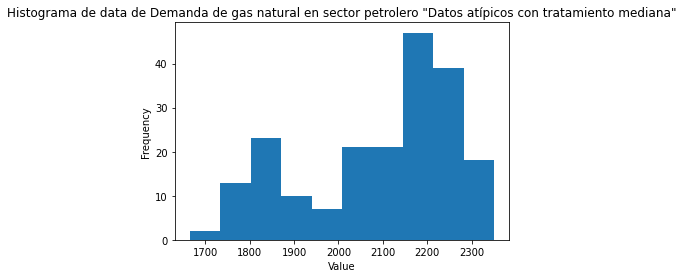

In [56]:
# Generate the histogram
plt.hist(demanda_petrolero_train_pretratamiento_mediana, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector petrolero "Datos atípicos con tratamiento mediana"')

# Display the plot
plt.show()

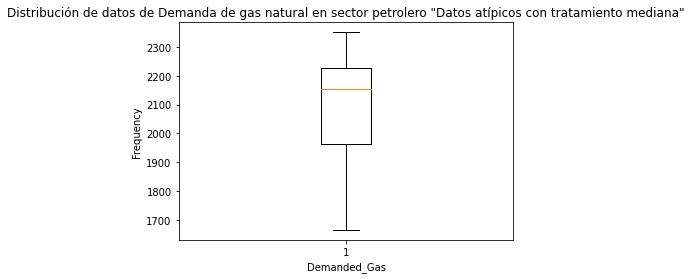

In [57]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_petrolero_train_pretratamiento_mediana)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector petrolero "Datos atípicos con tratamiento mediana"')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data datos atípicos con tratamiento mediana

In [58]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_petrolero_train_pretratamiento_mediana = adfuller(demanda_petrolero_train_pretratamiento_mediana)


adf_test_demanda_petrolero_train_pretratamiento_mediana

(-0.973790324855718,
 0.7627032611225253,
 14,
 186,
 {'1%': -3.466005071659723,
  '5%': -2.8772078537639385,
  '10%': -2.5751221620996647},
 2067.1911810147294)

In [59]:
print(f"The ADF statistic value f is: {adf_test_demanda_petrolero_train_pretratamiento_mediana[0]}")

print(f"The ADF p value p is: {adf_test_demanda_petrolero_train_pretratamiento_mediana[1]}")

if adf_test_demanda_petrolero_train_pretratamiento_mediana[0] < adf_test_demanda_petrolero_train_pretratamiento_mediana[4]['5%']:
      print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")


The ADF statistic value f is: -0.973790324855718
The ADF p value p is: 0.7627032611225253
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


También para este caso se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector petrolero en México

In [60]:
demanda_petrolero_train_tratamiento_mediana_diff1 = demanda_petrolero_train_pretratamiento_mediana.diff()
demanda_petrolero_train_tratamiento_mediana_diff1

Date
2005-01-01       NaN
2005-02-01    -24.63
2005-03-01    -45.74
2005-04-01     38.68
2005-05-01     33.67
               ...  
2021-05-01    120.15
2021-06-01     85.35
2021-07-01     18.53
2021-08-01     43.82
2021-09-01     23.82
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento mediana" DIFERENCIA 1

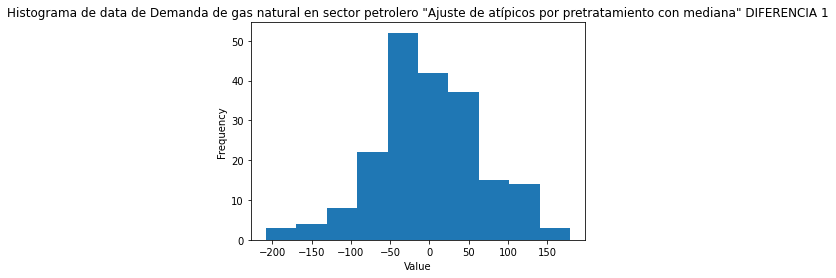

In [61]:
# Generate the histogram
plt.hist(demanda_petrolero_train_tratamiento_mediana_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector petrolero "Ajuste de atípicos por pretratamiento con mediana" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data con pretratamiento de mediana Diferencia 1

In [62]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_petrolero_train_tratamiento_mediana_diff1 = adfuller(demanda_petrolero_train_tratamiento_mediana_diff1.dropna())


adf_test_demanda_petrolero_train_tratamiento_mediana_diff1

(-3.4088290456675487,
 0.0106615471657898,
 13,
 186,
 {'1%': -3.466005071659723,
  '5%': -2.8772078537639385,
  '10%': -2.5751221620996647},
 2056.123890108526)

In [63]:
print(f"The ADF statistic value f is: {adf_test_demanda_petrolero_train_tratamiento_mediana_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_petrolero_train_tratamiento_mediana_diff1[1]}")

if adf_test_demanda_petrolero_train_tratamiento_mediana_diff1[0] < adf_test_demanda_petrolero_train_tratamiento_mediana_diff1[4]['5%']:
     print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")


The ADF statistic value f is: -3.4088290456675487
The ADF p value p is: 0.0106615471657898
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


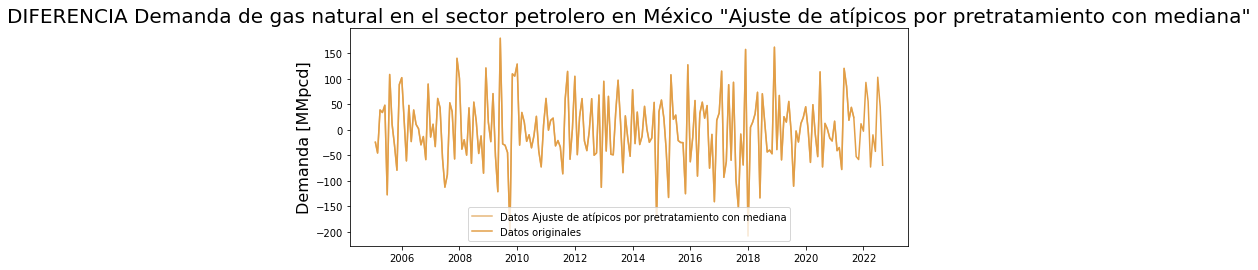

In [64]:
plt.figure(figsize=(10,4))
plt.plot(demanda_petrolero_train_tratamiento_mediana_diff1, color='#E7B779')
plt.plot(demanda_petrolero_original_diff1, color='#E29E46')

plt.title('DIFERENCIA Demanda de gas natural en el sector petrolero en México "Ajuste de atípicos por pretratamiento con mediana"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
plt.legend(['Datos Ajuste de atípicos por pretratamiento con mediana', 'Datos originales'], loc='lower center', fontsize=10)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento mediana"

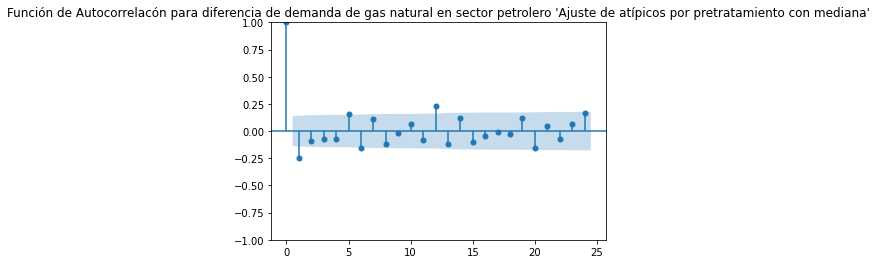

In [65]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_petrolero_train_tratamiento_mediana_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con mediana'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


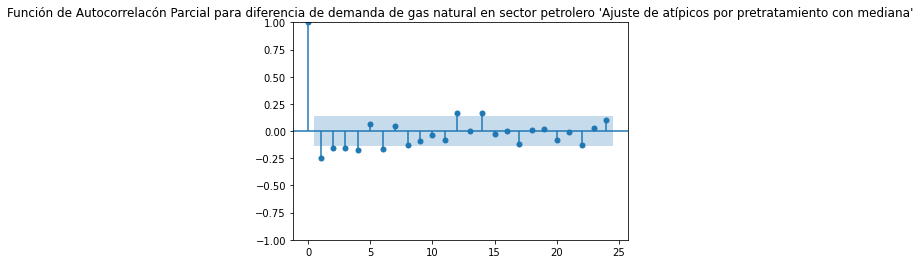

In [66]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_petrolero_train_tratamiento_mediana_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector petrolero 'Ajuste de atípicos por pretratamiento con mediana'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media'

In [67]:
##Create the model
model_ARIMA_petrolero_tratamiento_mediana = ARIMA (demanda_petrolero_train_pretratamiento_mediana, order=(4,1,3))

##Fit the model
start = time()
model_ARIMA_petrolero_tratamiento_mediana_fit = model_ARIMA_petrolero_tratamiento_mediana.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_petrolero_tratamiento_mediana_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.5132603645324707
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1105.200
Date:                Sat, 07 Oct 2023   AIC                           2226.400
Time:                        12:33:15   BIC                           2252.787
Sample:                    01-01-2005   HQIC                          2237.078
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2867      0.131     -9.838      0.000      -1.543      -1.030
ar.L2         -0.2050      0.287     -0.713      0.476      -0.769       0.358
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
##get prediction start and end dates 
pred_model_ARIMA_petrolero_start_date = demanda_petrolero_original_test_data.index[0]
pred_model_ARIMA_petrolero_end_date = demanda_petrolero_original_test_data.index[-1]

In [69]:
##get the predictors and residuals 
predictions_model_ARIMA_petrolero_tratamiento_mediana = model_ARIMA_petrolero_tratamiento_mediana_fit.predict(start=pred_model_ARIMA_petrolero_start_date, end= pred_model_ARIMA_petrolero_end_date)
print(predictions_model_ARIMA_petrolero_tratamiento_mediana)

2021-10-01    1884.270466
2021-11-01    1908.210779
2021-12-01    1866.218868
2022-01-01    1888.940316
2022-02-01    1882.463585
2022-03-01    1870.007181
2022-04-01    1898.532760
2022-05-01    1860.294326
2022-06-01    1900.004351
2022-07-01    1867.386787
2022-08-01    1885.959959
2022-09-01    1885.315211
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

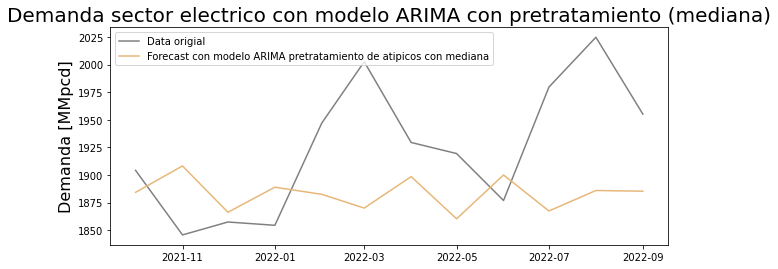

In [70]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_mediana,color='#E7B779')

plt.legend(('Data origial', 'Forecast con modelo ARIMA pretratamiento de atipicos con mediana'), fontsize=10)


plt.title('Demanda sector electrico con modelo ARIMA con pretratamiento (mediana)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento mediana

In [71]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_petrolero_tratamiento_mediana = mean_absolute_percentage_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_ARIMA_petrolero_tratamiento_mediana)
RMSE_predictions_model_ARIMA_petrolero_tratamiento_mediana = np.sqrt(mean_squared_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_ARIMA_petrolero_tratamiento_mediana))

print('MAPE:', MAPE_predictions_model_ARIMA_petrolero_tratamiento_mediana)
print('RMSE:', RMSE_predictions_model_ARIMA_petrolero_tratamiento_mediana)

MAPE: 0.032278868053211805
RMSE: 75.8900533887788


Text(0, 0.5, 'Demanda [MMpcd]')

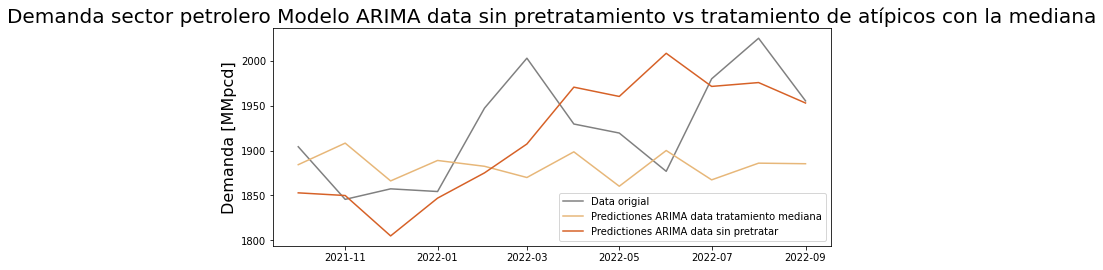

In [72]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_mediana,  color='#E7B779')
plt.plot(predictions_model_ARIMA_petrolero_original,  color='#D66127')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento mediana', 'Predictiones ARIMA data sin pretratar'), fontsize=10)

plt.title('Demanda sector petrolero Modelo ARIMA data sin pretratamiento vs tratamiento de atípicos con la mediana', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Vamos a entrenar un segundo modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media'

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create the SARIMA model
model_SARIMA_petrolero_tratamiento_mediana = SARIMAX(demanda_petrolero_train_pretratamiento_mediana, order=(3, 1, 1), seasonal_order=(0, 1, 0, 12))

# Fit the SARIMA model
model_SARIMA_petrolero_tratamiento_mediana_fit = model_SARIMA_petrolero_tratamiento_mediana.fit()

# Print the summary of the model
print(model_SARIMA_petrolero_tratamiento_mediana_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Demanded_Gas   No. Observations:                  201
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1084.761
Date:                             Sat, 07 Oct 2023   AIC                           2179.523
Time:                                     12:33:16   BIC                           2195.705
Sample:                                 01-01-2005   HQIC                          2186.079
                                      - 09-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1514      0.287      0.528      0.598      -0.411       0.714
ar.L2         -0.2167      

Se obtiene el forecas del model SARIMA electrico tratamiento mediana

In [74]:
##get the predictors and residuals 
predictions_model_SARIMA_petrolero_tratamiento_mediana = model_SARIMA_petrolero_tratamiento_mediana_fit.predict(start=pred_model_ARIMA_petrolero_start_date, end= pred_model_ARIMA_petrolero_end_date)
print(predictions_model_SARIMA_petrolero_tratamiento_mediana)

2021-10-01    1913.970937
2021-11-01    1885.359444
2021-12-01    1870.741917
2022-01-01    1892.274975
2022-02-01    1850.580388
2022-03-01    1814.263607
2022-04-01    1736.071836
2022-05-01    1856.494924
2022-06-01    1941.960546
2022-07-01    1960.453617
2022-08-01    2004.236239
2022-09-01    2028.055728
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

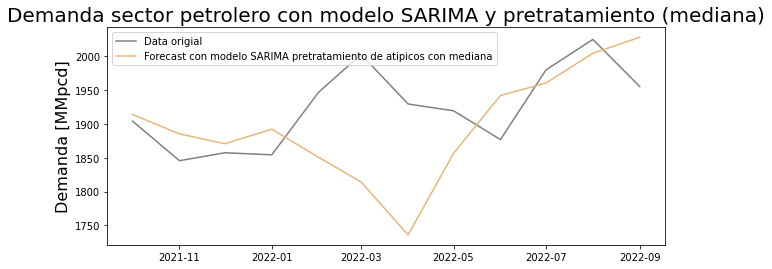

In [75]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_SARIMA_petrolero_tratamiento_mediana,  color='#E7B779')

plt.legend(('Data origial', 'Forecast con modelo SARIMA pretratamiento de atipicos con mediana'))


plt.title('Demanda sector petrolero con modelo SARIMA y pretratamiento (mediana)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_SARIMA_electrico_tratamiento_mediana

In [77]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_SARIMA_petrolero_tratamiento_mediana = mean_absolute_percentage_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_SARIMA_petrolero_tratamiento_mediana)
RMSE_predictions_model_SARIMA_petrolero_tratamiento_mediana = np.sqrt(mean_squared_error(demanda_petrolero_original_test_data['Demanded_Gas'], predictions_model_SARIMA_petrolero_tratamiento_mediana))

print('MAPE:', MAPE_predictions_model_SARIMA_petrolero_tratamiento_mediana)
print('RMSE:', RMSE_predictions_model_SARIMA_petrolero_tratamiento_mediana)

MAPE: 0.03522522726970457
RMSE: 91.18827968532366


Text(0, 0.5, 'Demanda [MMpcd]')

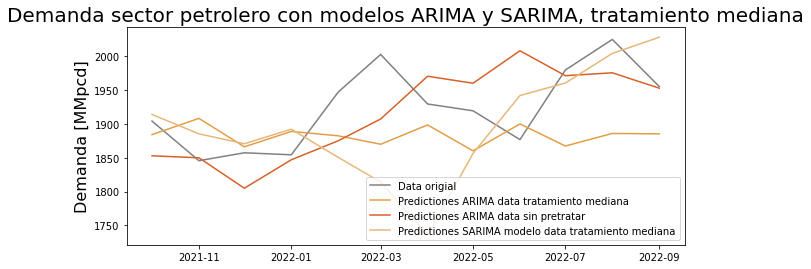

In [78]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_petrolero_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_petrolero_tratamiento_media,  color='#E29E46')
plt.plot(predictions_model_ARIMA_petrolero_original, color='#D66127')
plt.plot(predictions_model_SARIMA_petrolero_tratamiento_mediana,  color='#E7B779')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento mediana', 'Predictiones ARIMA data sin pretratar', 'Predictiones SARIMA modelo data tratamiento mediana'), fontsize=10)

plt.title('Demanda sector petrolero con modelos ARIMA y SARIMA, tratamiento mediana', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)